###Detecção de Circulos


##Baixar arquivos de imagens

In [1]:
!wget https://github.com/Nio00110011/Vis-o-Computacional/archive/refs/heads/main.zip
!unzip main.zip
!rm -f main.zip
baseDir = "/content/Vis-o-Computacional-main/imagensDados/"

--2024-03-26 18:19:23--  https://github.com/Nio00110011/Vis-o-Computacional/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Nio00110011/Vis-o-Computacional/zip/refs/heads/main [following]
--2024-03-26 18:19:23--  https://codeload.github.com/Nio00110011/Vis-o-Computacional/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [  <=>               ] 646.36K  2.05MB/s    in 0.3s    

2024-03-26 18:19:24 (2.05 MB/s) - ‘main.zip’ saved [661877]

Archive:  main.zip
e759c26bc1f8c104bc42bcb6e2067649c8f5f087
   creating: Vis-o-Computacional-main/
   creating:

##Manipulando o arquivo img1.jpg

Soma das faces dos dados: 11


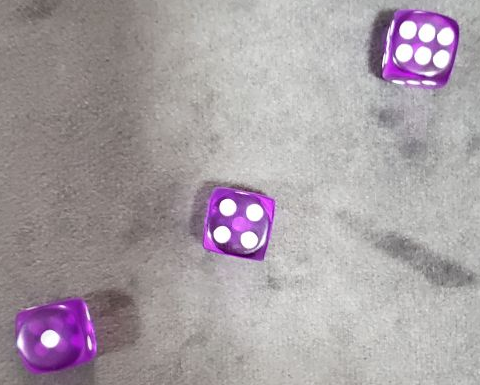


img1.jpg


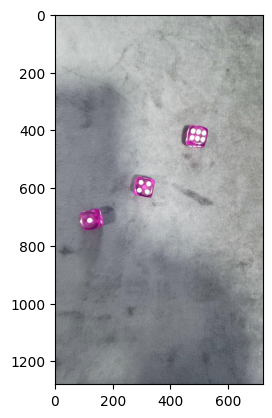

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline
# Ler imagem e recortar área de interesse
img = cv.imread(baseDir+"img1.jpg", 0)
img = img[375:760,70:550]
imgOrig = cv.imread(baseDir+"img1.jpg")
dados = imgOrig[375:760,70:550]
# Aplicar erosão
elemento = cv.getStructuringElement(cv.MORPH_ELLIPSE, (1,1))
resultado = cv.erode(img, elemento, iterations = 30)
erosao = resultado.copy()
# Capturar dimenções e definir cores
altura, largura = erosao.shape
branco = [255, 255, 255]
preto = [0, 0, 0]
verde = [0, 255, 0]
# Pintar de preto o que for diferente de branco
for i in range(altura):
    for j in range(largura):
        if all(erosao[i,j]!=branco):
            cv.floodFill(erosao, None, (j,i), preto)
# Aplicar Dilatação com 3 iterações
elemento = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,4))
resultado = cv.dilate(erosao, elemento, iterations = 3)
# Contar bolas brancas(face dos dados)
img = resultado.copy()
buracos=0
cv.floodFill(img, None, (0,0), verde)
for i in range(altura):
    for j in range(largura):
        if all(img[i,j]==branco):
            buracos+=1
            cv.floodFill(img, None, (j,i), verde)
# Resultado
print('Soma das faces dos dados:',buracos)
cv2_imshow(dados)
print()
print("img1.jpg")
plt.imshow(imgOrig)

##Manipulando o arquivo img2.jpg


Soma da face do dado: 4


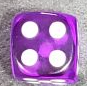


img2.jpg


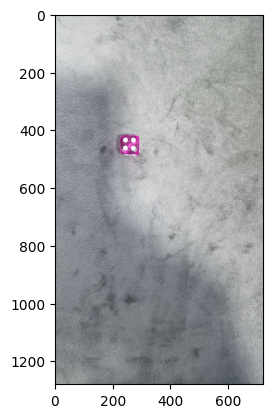

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline
# Ler imagem e recortar área de interesse
img = cv.imread(baseDir+"img2.jpg", 0)
img = img[426:472,234:281]
imgOrig = cv.imread(baseDir+"img2.jpg")
dados = imgOrig[406:492,214:301]
# Aplicar erosão
elemento = cv.getStructuringElement(cv.MORPH_ELLIPSE, (1,1))
resultado = cv.erode(img, elemento, iterations = 30)
erosao = resultado.copy()
# Capturar dimenções e definir cores
altura, largura = erosao.shape
branco = [255, 255, 255]
preto = [0, 0, 0]
verde = [0, 255, 0]
# Pintar de preto o que for diferente de branco
for i in range(altura):
    for j in range(largura):
        if all(erosao[i,j]!=branco):
            cv.floodFill(erosao, None, (j,i), preto)
# Aplicar Dilatação com 2 iterações
elemento = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,4))
resultado = cv.dilate(erosao, elemento, iterations = 2)
# Contar bolas brancas(face dos dados)
img = resultado.copy()
buracos=0
cv.floodFill(img, None, (0,0), verde)
for i in range(altura):
    for j in range(largura):
        if all(img[i,j]==branco):
            buracos+=1
            cv.floodFill(img, None, (j,i), verde)
# Resultado
print('Soma da face do dado:',buracos)
cv2_imshow(dados)
print()
print("img2.jpg")
plt.imshow(imgOrig)

##Manipulando o arquivo img3.jpg

Soma das faces dos dados: 15


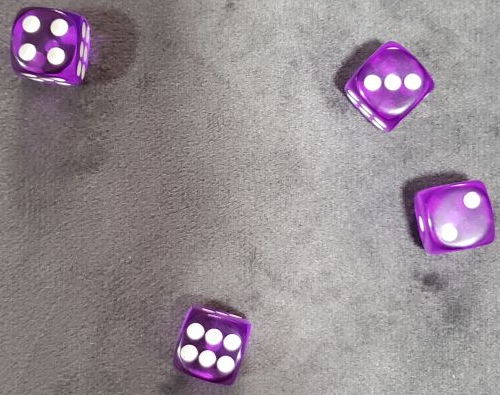


img3.jpg


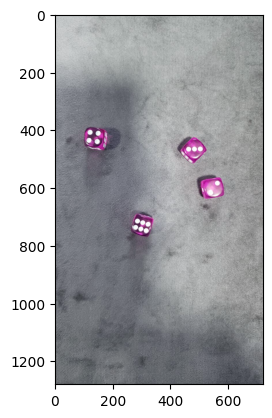

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline
# Ler imagem e recortar área de interesse
img = cv.imread(baseDir+"img3.jpg")
imgOrig = cv.imread(baseDir+"img3.jpg")
dados = imgOrig[385:780,90:590]
# Recortar área de interesse de um dado único e transformar perspectiva
dado4 = img[400:450,108:159]
pontosOrigem = np.float32([[5,0], [50,5], [0,45], [45,50]])
pontosDestino = np.float32([[0,0], [50,0], [0,50], [50,50]])
matriz = cv.getPerspectiveTransform(pontosOrigem, pontosDestino)
resultado = cv.warpPerspective(dado4, matriz, (50,50))
dado4 = resultado.copy()
# Recortar área de interesse de um dado único e transformar perspectiva
dado3 = img[430:510,440:520]
pontosOrigem = np.float32([[10,40], [40,3], [40,65], [80,40]])
pontosDestino = np.float32([[0,0], [80,0], [0,80], [80,80]])
matriz = cv.getPerspectiveTransform(pontosOrigem, pontosDestino)
resultado = cv.warpPerspective(dado3, matriz, (80,80))
dado3 = resultado.copy()
# Recortar área de interesse de um dado único e transformar perspectiva
dado2 = img[570:640,520:580]
pontosOrigem = np.float32([[0,45], [37,0], [15,70], [60,8]])
pontosDestino = np.float32([[0,0], [70,0], [0,70], [70,70]])
matriz = cv.getPerspectiveTransform(pontosOrigem, pontosDestino)
resultado = cv.warpPerspective(dado2, matriz, (80,80))
dado2 = resultado[12:69,4:68].copy()
# Recortar área de interesse de um dado único e transformar perspectiva
dado6 = img[690:770,261:341]
pontosOrigem = np.float32([[0,58], [7,0], [62,80], [80,18]])
pontosDestino = np.float32([[0,0], [80,0], [0,80], [80,80]])
matriz = cv.getPerspectiveTransform(pontosOrigem, pontosDestino)
resultado = cv.warpPerspective(dado6, matriz, (80,80))
dado6 = resultado[10:76,8:68].copy()
# Unir imagens de dado único recortadas
imgCola = np.zeros((86,271,3),dtype='uint8')
imgCola[3:60,2:66] = dado2
imgCola[3:83,70:150] = dado3
imgCola[3:53,155:205] = dado4
imgCola[3:69,209:269] = dado6
#cv2_imshow(imgCola)

# Aplicar erosão
img = imgCola.copy()
elemento = cv.getStructuringElement(cv.MORPH_ELLIPSE, (1,1))
resultado = cv.erode(img, elemento, iterations = 30)
erosao = resultado.copy()
# Capturar dimenções e definir cores
altura, largura,_ = erosao.shape
branco = [255, 255, 255]
preto = [0, 0, 0]
verde = [0, 255, 0]
# Pintar de preto o que for diferente de branco
for i in range(altura):
    for j in range(largura):
        if all(erosao[i,j]!=branco):
            cv.floodFill(erosao, None, (j,i), preto)
# Aplicar Dilatação com 4 iterações
elemento = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))
resultado = cv.dilate(erosao, elemento, iterations = 4)
# Contar bolas brancas(face dos dados)
img = resultado.copy()
buracos=0
cv.floodFill(img, None, (0,0), verde)
for i in range(altura):
    for j in range(largura):
        if all(img[i,j]==branco):
            buracos+=1
            cv.floodFill(img, None, (j,i), verde)
# Resultado
print('Soma das faces dos dados:',buracos)
cv2_imshow(dados)
print()
print("img3.jpg")
plt.imshow(imgOrig)

##Manipulando o arquivo img4.jpg

Soma das faces dos dados: 7


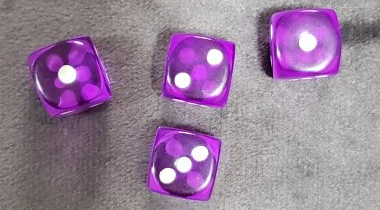


img4.jpg


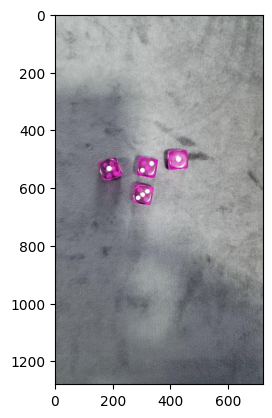

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline
# Ler imagem e recortar área de interesse
img = cv.imread(baseDir+"img4.jpg")
imgOrig = cv.imread(baseDir+"img4.jpg")
dados = imgOrig[460:670,120:500]
# Aplicar erosão
img = dados.copy()
elemento = cv.getStructuringElement(cv.MORPH_ELLIPSE, (1,1))
resultado = cv.erode(img, elemento, iterations = 30)
erosao = resultado.copy()
# Capturar dimenções e definir cores
altura, largura,_ = erosao.shape
branco = [255, 255, 255]
preto = [0, 0, 0]
verde = [0, 255, 0]
# Pintar de preto o que for diferente de branco
for i in range(altura):
    for j in range(largura):
        if all(erosao[i,j]!=branco):
            cv.floodFill(erosao, None, (j,i), preto)
# Aplicar Dilatação com 6 iterações
elemento = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2,3))
resultado = cv.dilate(erosao, elemento, iterations = 6)
# Contar bolas brancas(face dos dados)
img = resultado.copy()
buracos=0
cv.floodFill(img, None, (0,0), verde)
for i in range(altura):
    for j in range(largura):
        if all(img[i,j]==branco):
            buracos+=1
            cv.floodFill(img, None, (j,i), verde)
# Resultado
print('Soma das faces dos dados:',buracos)
cv2_imshow(dados)
print()
print("img4.jpg")
plt.imshow(imgOrig)